<a href="https://colab.research.google.com/github/rubanzasilva/ps-s03e02/blob/main/ps_s03e02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.tabular.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/Rubanza/datasets/playground-series-s3e2/

sample_submission.csv  test.csv  train.csv


In [ ]:
path = Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2/')
path

Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2')

In [ ]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample_df = pd.read_csv(path/'sample_submission.csv')
train_df


In [ ]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="stroke",
    cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [ ]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
                   y_names='stroke',
                   splits=splits)

In [ ]:
to.xs.iloc[:2]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi
4120,1,1,1,1,3,1,1,-0.792525,-0.488059,-1.251150,-1.002203
8944,1,1,1,2,3,1,1,0.292607,1.290013,-0.733142,-0.582832


In [ ]:
dls = to.dataloaders(bs=64)

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

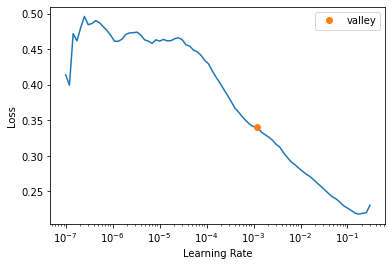

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.061738,0.045913,0.957190,00:02
1,0.041604,0.045773,0.957190,00:02
2,0.042714,0.045116,0.957190,00:02
3,0.042195,0.041735,0.957190,00:02
4,0.041865,0.037984,0.957190,00:02
5,0.037436,0.042812,0.957190,00:02
6,0.036711,0.037619,0.957190,00:02
7,0.035268,0.037639,0.957190,00:02
8,0.038655,0.036803,0.957190,00:02
9,0.035025,0.037965,0.957190,00:02


In [ ]:
dl = learn.dls.test_dl(test_df)

In [ ]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[ 0.0444],
         [ 0.2073],
         [-0.0151],
         ...,
         [-0.0525],
         [ 0.0185],
         [-0.0356]]), None)

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"069494dac9599dfa6ad2faeffa757e38"}'}

In [ ]:

 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
#!kaggle datasets list

In [ ]:
target_preds = preds[0]

In [ ]:
test_df['stroke'] = target_preds

test_df.to_csv('submission.csv', columns=['id','stroke'], index=False)

sub = pd.read_csv('submission.csv')
sub.head()

,id,stroke
0,15304,0.044416
1,15305,0.207278
2,15306,-0.015053
3,15307,0.066668
4,15308,0.010570


In [ ]:
!kaggle competitions submit -c playground-series-s3e2 -f submission.csv -m "fastai baseline"

100% 181k/181k [00:00<00:00, 767kB/s]
Successfully submitted to Playground Series Season 3, Episode 2